In [59]:
import numpy as np
import keras
from keras import backend as k 
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

In [61]:
train_batches = ImageDataGenerator(rescale=1/255.,rotation_range=20,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True).flow_from_directory(train_path, target_size=(224,224), classes=['dr','nodr'], batch_size=10)
valid_batches = ImageDataGenerator(rescale=1/255.,rotation_range=20,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True).flow_from_directory(valid_path, target_size=(224,224), classes=['dr','nodr'], batch_size=10)
test_batches = ImageDataGenerator(rescale=1/255.,rotation_range=20,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True).flow_from_directory(test_path, target_size=(224,224), classes=['dr','nodr'], batch_size=10)

Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [62]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0] is np.ndarray):
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [63]:
imgs , labels = next(train_batches)

c:\Users\nikit\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


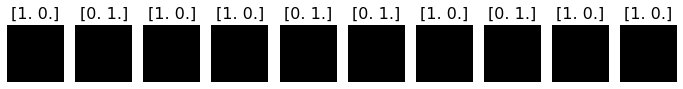

In [64]:
plots(imgs, titles=labels)

In [158]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=.0001), metrics=["accuracy"])

c:\Users\nikit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [159]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_109 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 conv2d_110 (Conv2D)         (None, 222, 222, 32)      9248      
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 dropout_58 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_111 (Conv2D)         (None, 111, 111, 64)      18496     
                                                                 
 conv2d_112 (Conv2D)         (None, 109, 109, 64)      36928     
                                                     

In [160]:
model.fit(train_batches,
                   validation_data=valid_batches, epochs=10)

Epoch 1/10
4/4 [==============================] - 17s 4s/step - loss: 0.7173 - accuracy: 0.4000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 16s 4s/step - loss: 0.6930 - accuracy: 0.5500 - val_loss: 0.6928 - val_accuracy: 0.5250
Epoch 3/10
4/4 [==============================] - 16s 4s/step - loss: 0.6949 - accuracy: 0.5250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 16s 4s/step - loss: 0.6964 - accuracy: 0.4500 - val_loss: 0.6921 - val_accuracy: 0.6750
Epoch 5/10
4/4 [==============================] - 16s 4s/step - loss: 0.7008 - accuracy: 0.3750 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 16s 4s/step - loss: 0.6992 - accuracy: 0.4500 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 19s 5s/step - loss: 0.6883 - accuracy: 0.5250 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 8/10
4/4 [==================

In [161]:
test_imgs, test_labels = next(test_batches)

In [162]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 1., 1., 0., 1., 1., 1., 1., 0.], dtype=float32)

In [163]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [164]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

C:\Users\nikit\AppData\Local\Temp\ipykernel_11752\2595695057.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_batches, steps=1, verbose=0)


In [166]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def calculate_results(y_true,y_pred):
    model_accuracy = accuracy_score(y_true,y_pred)*100
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
    return model_results

In [167]:
calculate_results(test_labels, predictions.argmax(axis=1))

c:\Users\nikit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 70.0,
 'precision': 0.48999999999999994,
 'recall': 0.7,
 'f1': 0.5764705882352941}

In [168]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[3 0]
 [7 0]]


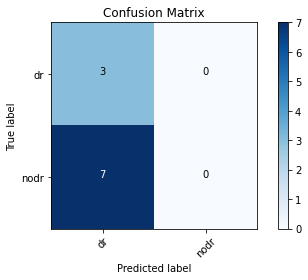

In [169]:
cm_plot_labels = ['dr','nodr']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [170]:
model.save('diabetic_retinopathy.h5')